In [1]:
import huracanpy

import xarray as xr
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from glob import glob
from tqdm import tqdm

## Tracks without CPS

In [2]:
flist = glob("TRACK_netcdf/*/*TRACK_all*.nc") # + glob("TRACK_netcdf/*/*TRACK_NH_all*.nc")

In [3]:
# List of available datasets
sources = [f.split('/')[1] for f in flist]
sources

['JRA3Q', 'ERA5', 'ECMWF-OP-AN', 'CERA20C', 'MERRA2', 'NCEP']

In [4]:
# Path dict
filepaths = {sources[i]:flist[i] for i in range(len(flist))}

In [5]:
# Data dict
data = {}
for s in tqdm(sources):
    data[s] = xr.open_dataset(filepaths[s]).rename({"psl":"pres"})

100%|██████████| 6/6 [01:18<00:00, 13.05s/it]


In [6]:
# Check trackids
for s in sources:
    sample = np.random.choice(len(data[s].record), 3)
    sample_pts = data[s].sel(record = sample)
    print(s, sample_pts.track_id.values)

JRA3Q ['SH-1953-10862' 'SH-2021-15883' 'SH-1969-7836']
ERA5 ['SH-2003-9031' 'NH-1997-14246' 'SH-1990-6081']
ECMWF-OP-AN ['NH-2010-1009' 'NH-2018-4386' 'SH-2013-5623']
CERA20C ['NH-2005-0-4800' 'SH-1904-9-5648' 'SH-1993-9-6382']
MERRA2 ['NH-1999-6590' 'NH-2004-5733' 'NH-1981-3418']
NCEP ['NH-2014-186' 'SH-1986-5801' 'SH-2006-4916']


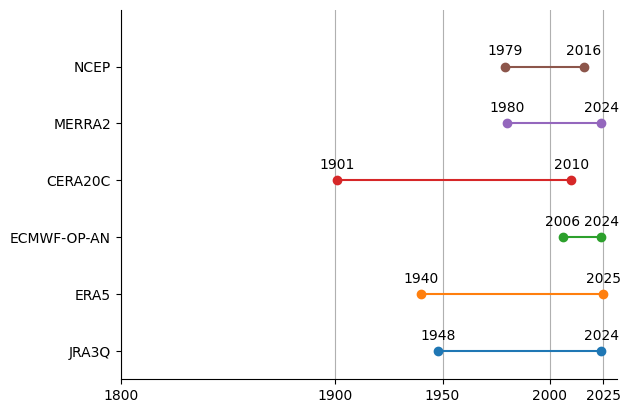

In [7]:
# Check durations
for i, s in enumerate(sources):
    Ymin, Ymax = data[s].time.dt.year.min().values, data[s].time.dt.year.max().values
    plt.plot([Ymin, Ymax], [i, i], marker = 'o')
    plt.text(Ymin, i+0.2, Ymin, horizontalalignment='center',)
    plt.text(Ymax, i+0.2, Ymax, horizontalalignment='center',)
plt.yticks(np.arange(len(sources)), sources)
plt.xticks([1800, 1900, 1950, 2000, 2025])
plt.ylim(-0.5, len(sources))
sns.despine()
plt.grid(axis = 'x')

(0.0, 21849.2)

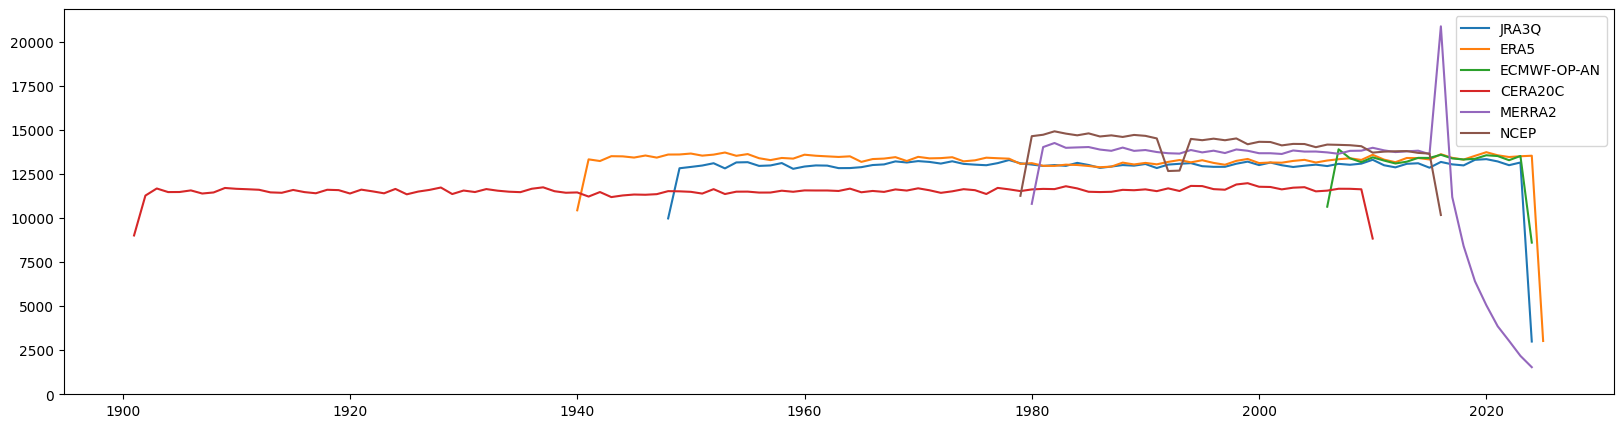

In [8]:
# Check Number of tracks per year
fig, axs = plt.subplots(figsize = (20,5))
for s in sources:
    Y = np.arange(1850, 2030)
    H, _ = np.histogram(data[s].hrcn.get_gen_vals().time.dt.year, bins = np.arange(1849.5, 2030))
    axs.plot(Y[H>0], H[H>0],label = s)
plt.legend()
plt.ylim(0)

In [9]:
data["MERRA2"].track_id

<xarray.DataArray 'track_id' (record: 9726664)> Size: 506MB
array(['NH-1980-1', 'NH-1980-1', 'NH-1980-1', ..., 'SH-s_ne-9999',
       'SH-s_ne-9999', 'SH-s_ne-9999'], shape=(9726664,), dtype='<U13')
Dimensions without coordinates: record

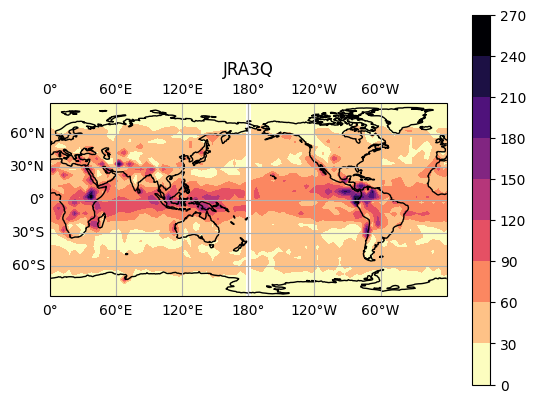

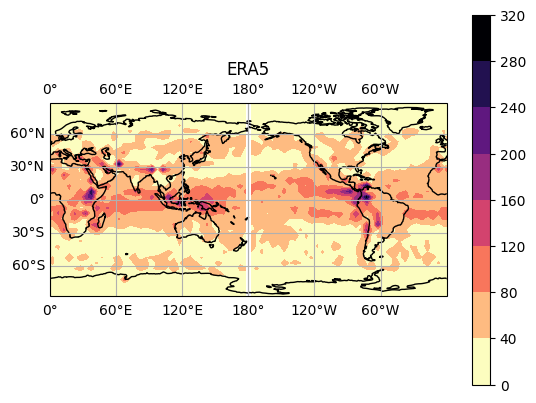

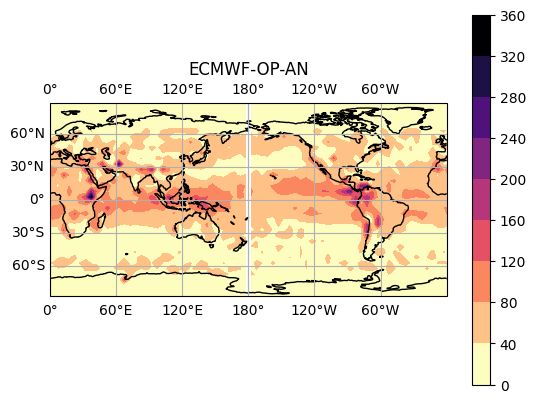

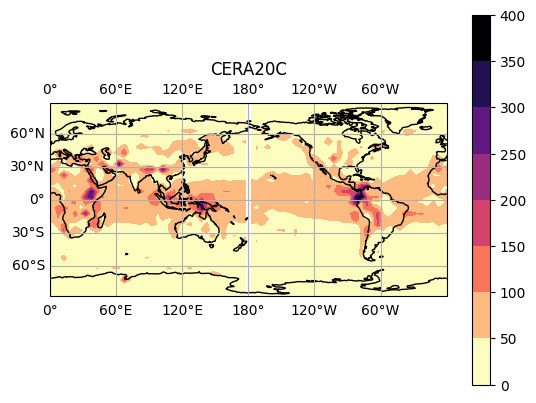

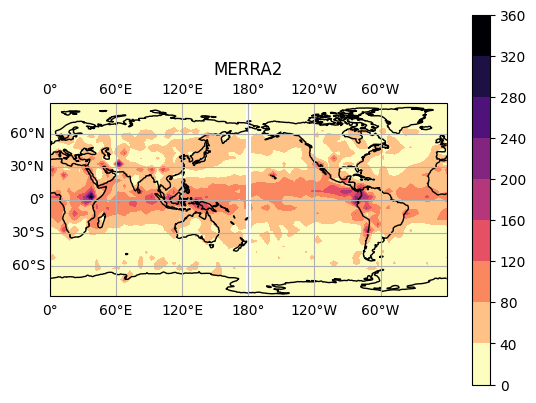

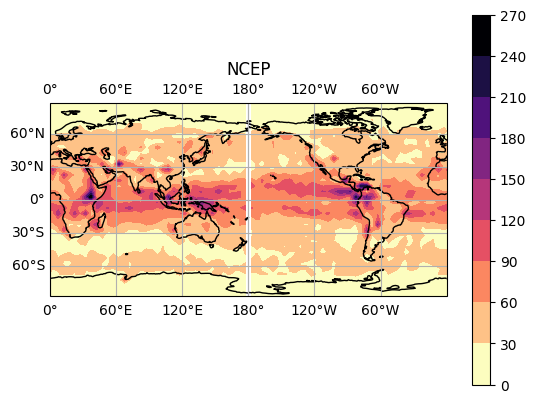

In [10]:
# Check geographical distribution
for s in sources:
    sample = np.random.choice(len(data[s].record), 100000)
    sample_pts = data[s].sel(record = sample)
    sample_pts.hrcn.plot_density()
    plt.title(s)

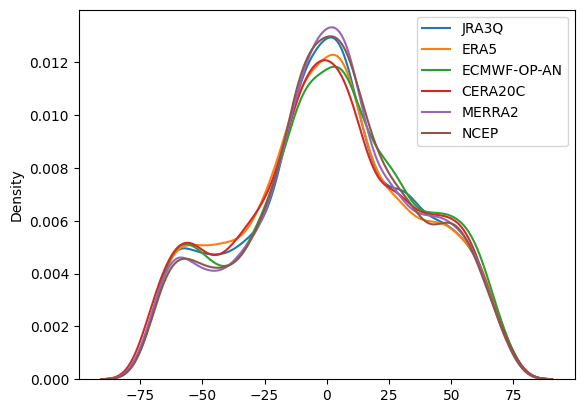

In [11]:
# Check latitude distribution
for s in sources:
    sample = np.random.choice(len(data[s].record), 10000)
    sample_pts = data[s].sel(record = sample)
    sns.kdeplot(sample_pts.lat, label = s)
plt.legend()

/tmp/ipykernel_664/2907107950.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


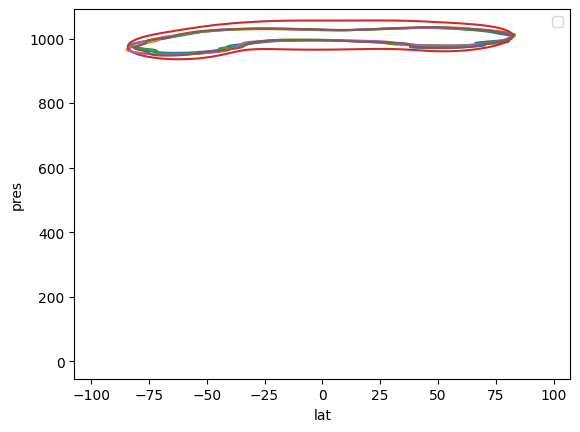

In [12]:
# Check psl values
for s in sources:
    sample = np.random.choice(len(data[s].record), 1000)
    sample_pts = data[s].sel(record = sample)
    sns.kdeplot(x=sample_pts.lat, y=sample_pts.pres, levels = 2, label = s)
plt.legend()

/tmp/ipykernel_664/323322730.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/tmp/ipykernel_664/323322730.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/tmp/ipykernel_664/323322730.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/tmp/ipykernel_664/323322730.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/tmp/ipykernel_664/323322730.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose 

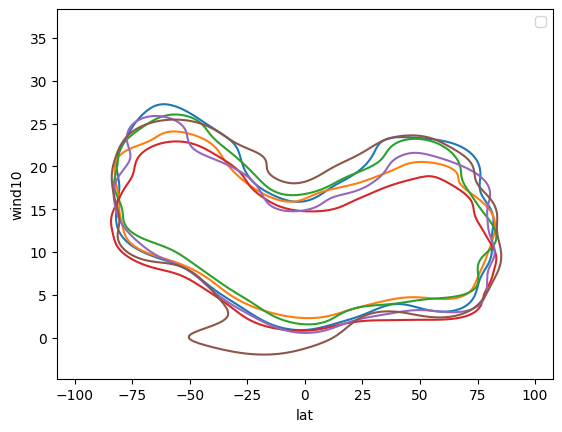

In [13]:
# Check wind values
for s in sources:
    sample = np.random.choice(len(data[s].record), 1000)
    sample_pts = data[s].sel(record = sample)
    sns.kdeplot(x=sample_pts.lat, y=sample_pts.wind10.where(sample_pts.wind10 <1e10), levels = 2,)
    plt.legend()

In [15]:
for s in sources:
    huracanpy.save(data[s], "TRACK/TRACK-"+s+".csv")

## Tracks with CPS

In [ ]:
flist = glob("TRACK_netcdf/*/*TRACK_tcident_nolat_CPS.nc") 
flist

In [ ]:
# List of available datasets
sources = [f.split('/')[1] for f in flist]
sources

In [ ]:
# Path dict
filepaths = {sources[i]:flist[i] for i in range(len(flist))}

In [ ]:
# Data dict
data = {}
for s in tqdm(sources):
    data[s] = xr.open_dataset(filepaths[s]).rename({"psl":"pres"})

In [ ]:
# Check trackids
for s in sources:
    sample = np.random.choice(len(data[s].record), 3)
    sample_pts = data[s].sel(record = sample)
    print(s, sample_pts.track_id.values)

In [ ]:
# Check Number of tracks per year
fig, axs = plt.subplots(figsize = (20,5))
for s in sources:
    Y = np.arange(1850, 2030)
    H, _ = np.histogram(data[s].hrcn.get_gen_vals().time.dt.year, bins = np.arange(1849.5, 2030))
    axs.plot(Y[H>0], H[H>0],label = s)
plt.legend()
plt.ylim(0)

In [ ]:
# Check durations
for i, s in enumerate(sources):
    Ymin, Ymax = data[s].time.dt.year.min().values, data[s].time.dt.year.max().values
    plt.plot([Ymin, Ymax], [i, i], marker = 'o')
    plt.text(Ymin, i+0.2, Ymin, horizontalalignment='center',)
    plt.text(Ymax, i+0.2, Ymax, horizontalalignment='center',)
plt.yticks(np.arange(len(sources)), sources)
plt.xticks([1800, 1900, 1950, 2000, 2025])
plt.ylim(-0.5, len(sources))
sns.despine()
plt.grid(axis = 'x')

In [ ]:
# Check geographical distribution
for s in sources:
    sample = np.random.choice(len(data[s].record), 100000)
    sample_pts = data[s].sel(record = sample)
    sample_pts.hrcn.plot_density()
    plt.title(s)

In [ ]:
for s in sources:
    huracanpy.save(data[s], "TRACK_CPS/TRACK_CPS-"+s+".csv")